**<h1>Credit Card Customer : Data analysis</h1>**
---

<h2>The purpose of progressing </h2>  

The data analysis we carried out is for Data Science Term Project  

We are going to analyze the data through End-to-End process that we learned in Data Science.  

<b>End-to-End Process:<b>
1. Objective
2. Data Curation
3. Data Inspection
4. Data Preprocessing
5. Data Analysis
6. Evaluation
7. Deployment

***


# 1. Objective Setting & 2. Data Curation

**<h2>Background  of the Dataset</h2>**

The dataset from a website with the URL as https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers
This dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

Banks should be careful that customers leave their credit card services.
Banks have a lot of information about their customers.
The bank wants to prevent customers from leaving by the customer's information they have.
They want to predict whether a particular customer will leave. 

**<h2>Our goal: Predicting the likelihood of a new card customer leaving</h2>**  



**Description of the Dataset** <br>
Columns description: <br>
CLIENTNUM: Client number. Unique identifier for the customer holding the account <br>
Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0 <br>
Customer_Age: Demographic variable - Customer's Age in Years <br>
Gender: Demographic variable - M=Male, F=Female <br>
Dependent_count: Demographic variable - Number of dependents <br>
Education_Level: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.) <br>
Marital_Status: Demographic variable - Married, Single, Divorced, Unknown <br>
Income_Category: Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown) <br>
Card_Category: Product Variable - Type of Card (Blue, Silver, Gold, Platinum) <br>
Months_on_book: Period of relationship with bank <br>
Total_Relationship_Count: Total no. of products held by the customer <br>
Months_Inactive_12_mon: No. of months inactive in the last 12 months <br>
Contacts_Count_12_mon: No. of Contacts in the last 12 months <br>
Credit_Limit: Credit Limit on the Credit Card <br>
Total_Revolving_Bal: Total Revolving Balance on the Credit Card <br>
Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months) <br>
Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1) <br>
Total_Trans_Amt: Total Transaction Amount (Last 12 months) <br>
Total_Trans_Ct: Total Transaction Count (Last 12 months) <br>
Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1) <br>
Avg_Utilization_Ratio: Average Card Utilization Ratio <br>

 
The target feature is Attrition_Flag

# 3. Data Inspection

In [66]:
# Importing necessery libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

      Attrition_Flag Gender Education_Level Marital_Status Income_Category  \
0  Existing Customer      M     High School        Married     $60K - $80K   
1  Existing Customer      F        Graduate         Single  Less than $40K   
2  Existing Customer      M        Graduate        Married    $80K - $120K   
3  Existing Customer      F     High School        Unknown  Less than $40K   
4  Existing Customer      M      Uneducated        Married     $60K - $80K   

  Card_Category  
0          Blue  
1          Blue  
2          Blue  
3          Blue  
4          Blue  


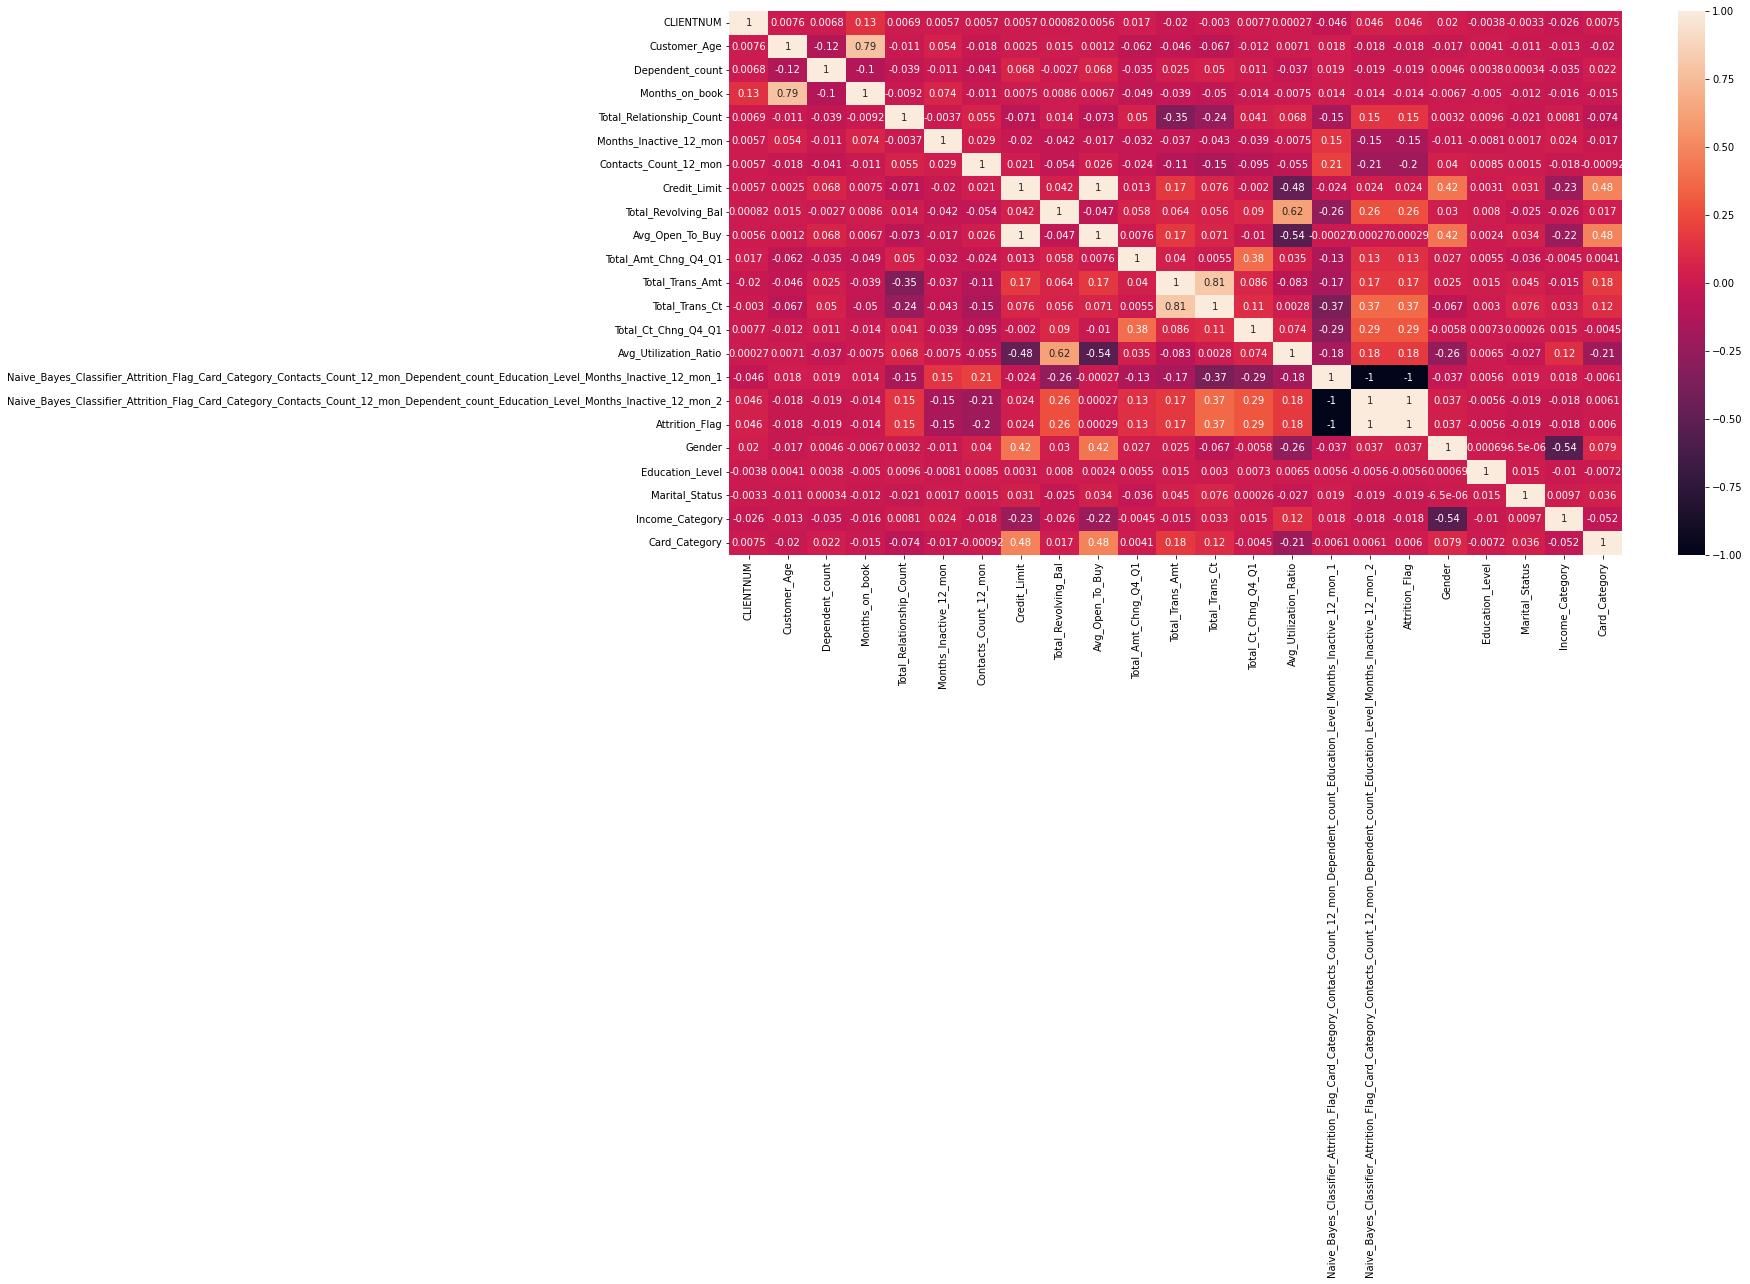

In [67]:
data = pd.read_csv('https://raw.githubusercontent.com/SevngIl/datascience_termProject/main/BankChurners.csv')
categorical_features = data.select_dtypes(include=['object'])
categorical_features = categorical_features.copy()
print(categorical_features.head())
numerical_features = data.select_dtypes(exclude=['object'])
numerical_features = numerical_features.copy()
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
col_to_encode = categorical_features.columns

for i in range(len(categorical_features.columns)):
        categorical_features[col_to_encode[i]] = label.fit_transform(categorical_features[col_to_encode[i]])
a=pd.concat([numerical_features, categorical_features], axis=1)
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(a.corr(), annot=True)
plt.show()

The features with low correlation with the target value was deleted.
And 2 features with name starts "Naive~ " are the obstacle to build proper model because it seems to be made with the result of target (also Kaggle dataset provider recommend to delete before starting analyze this model)

In [68]:
# loading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/SevngIl/datascience_termProject/main/BankChurners.csv')
df = df[df.columns[:-2]]
df.drop(columns=['CLIENTNUM'], inplace=True)
df.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [69]:
# Inspect datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [70]:
# Statistical Analysis of Data
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [71]:
# Check count of missing values
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

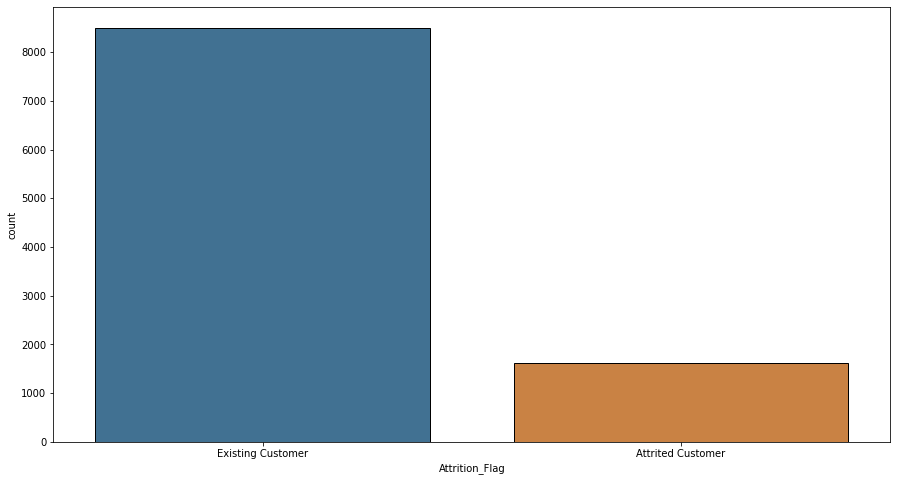

In [72]:
# Visualize the categorical data #1: Attrition_Flag
plt.figure(figsize = (15,8))
sns.countplot(x = df['Attrition_Flag'], edgecolor = 'black', saturation = 0.55)
plt.show()

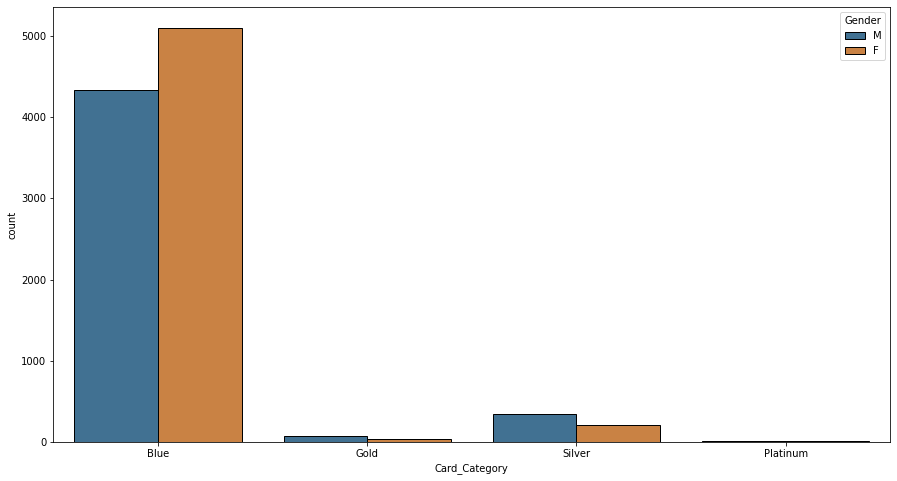

In [73]:
# Visualize the categorical data #2: Card_Category
plt.figure(figsize = (15, 8))
sns.countplot(x = df['Card_Category'], hue = df['Gender'], edgecolor = 'black', saturation = 0.55)
plt.show()

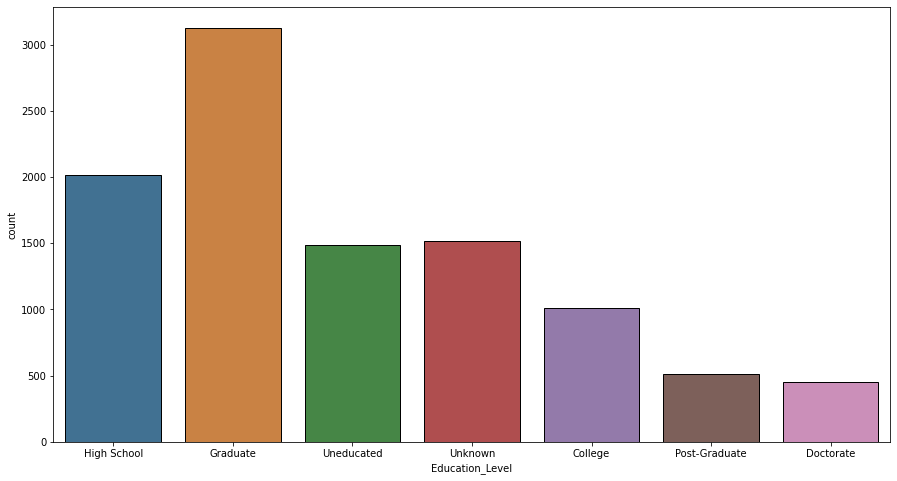

In [74]:
# Visualize the categorical data #3: Education_Level
plt.figure(figsize = (15,8))
sns.countplot(x= df['Education_Level'], edgecolor = 'black', saturation = 0.55)
plt.show()

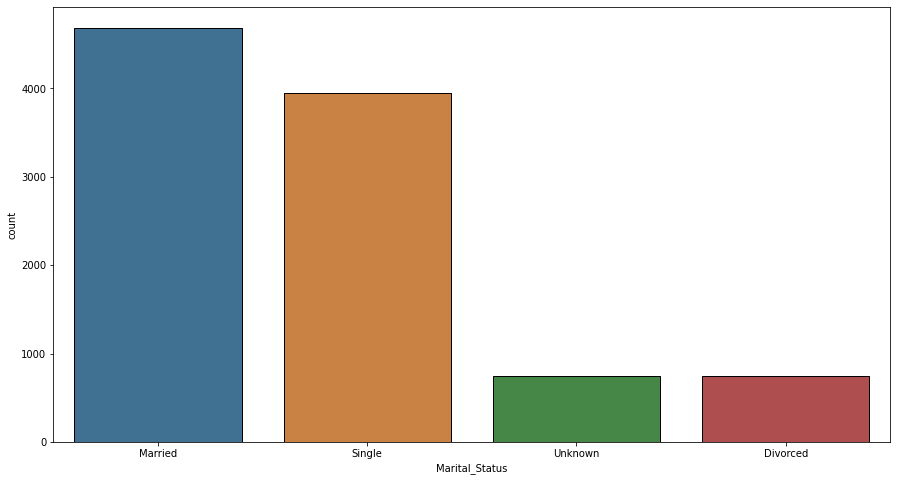

In [75]:
# Visualize the categorical data #4: Marital_Status
plt.figure(figsize = (15,8))
sns.countplot(x = df['Marital_Status'], edgecolor = 'black', saturation = 0.55)
plt.show()

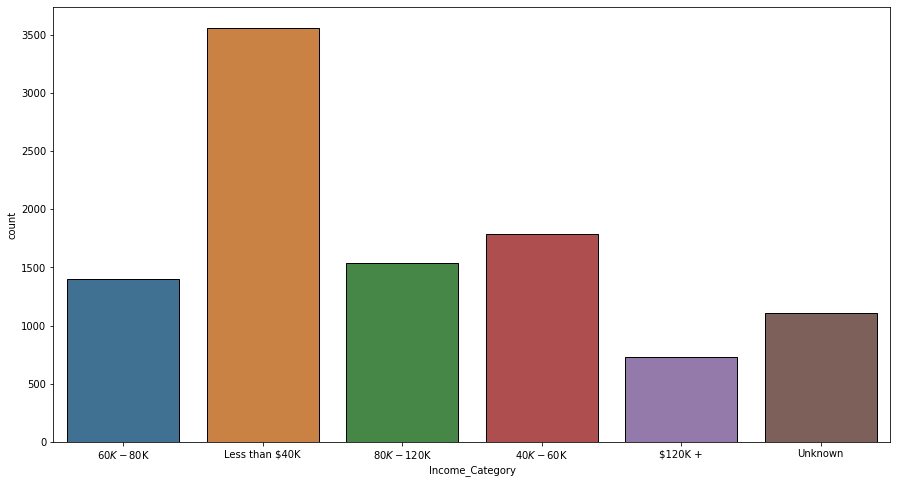

In [76]:
# Visualize the categorical data #5: Income_Category
plt.figure(figsize = (15,8))
sns.countplot(x = df['Income_Category'], edgecolor = 'black', saturation = 0.55)
plt.show()

In [77]:
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

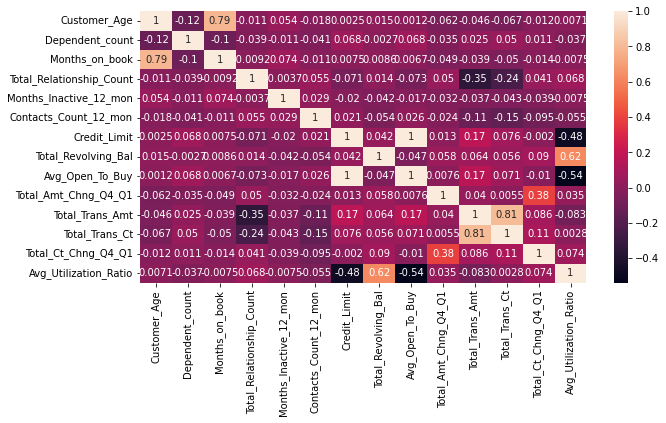

In [78]:
# Visualize numerical data : Months_on_book, Customer_age, Avg_Utilization_Ratio and Total_Revolving_Bal

fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(X.corr(), annot=True)
plt.show()

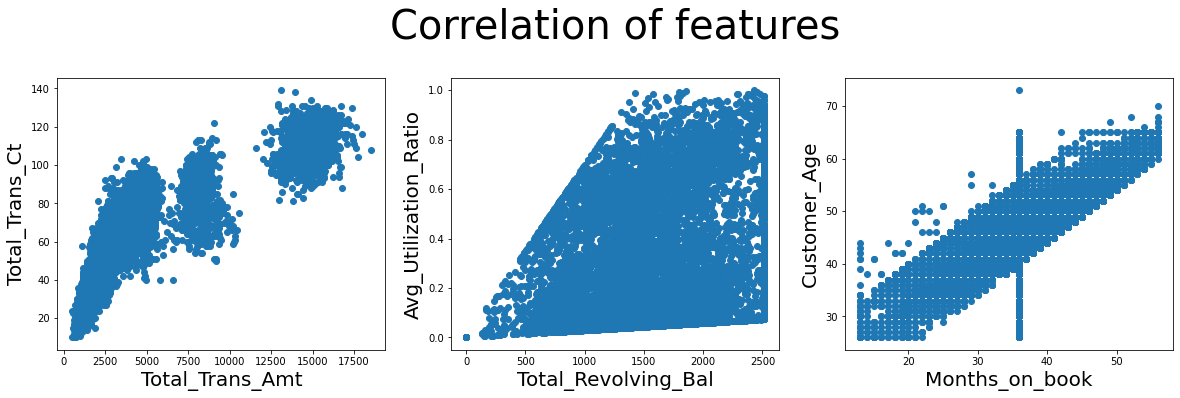

In [79]:
# scattergraph on the six most correlatable features: 'Total_Trans_Amt' and 'Total_Trans_Ct', 'Total_Revolving_Bal' and 'Avg_Utilization_Ratio', 'Months_on_book' and 'Customer_Age'.

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

ax1.scatter(X['Total_Trans_Amt'], df['Total_Trans_Ct'])
ax2.scatter(X['Total_Revolving_Bal'], df['Avg_Utilization_Ratio'])
ax3.scatter(X['Months_on_book'], df['Customer_Age'])

ax1.set_xlabel('Total_Trans_Amt', fontsize=20)
ax1.set_ylabel('Total_Trans_Ct', fontsize=20)

ax2.set_xlabel('Total_Revolving_Bal', fontsize=20)
ax2.set_ylabel('Avg_Utilization_Ratio', fontsize=20)

ax3.set_xlabel('Months_on_book', fontsize=20)
ax3.set_ylabel('Customer_Age', fontsize=20)

ax2.set_title('Correlation of features', fontsize=40, pad=40)

plt.show()

# 4. Data Preprocessing

There is 'Unknown' values which are same as missing values
Giving Nan values to Unknown in categorical variables is a great technique to deal with missing values in categorical variables

In [80]:
# Replace 'Unknown' values to NaN
df = df.replace('Unknown', np.nan)

In [81]:
# Check count of missing values
df.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

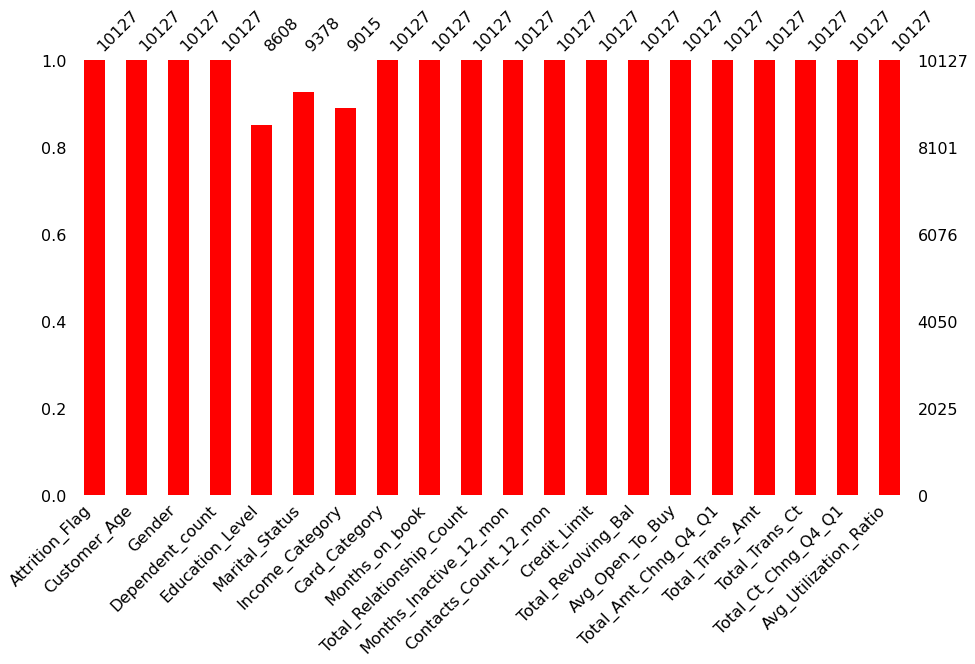

In [82]:
# Visualizing missing value
missingno.bar(df, color = 'red', figsize = (15,8))
plt.show()

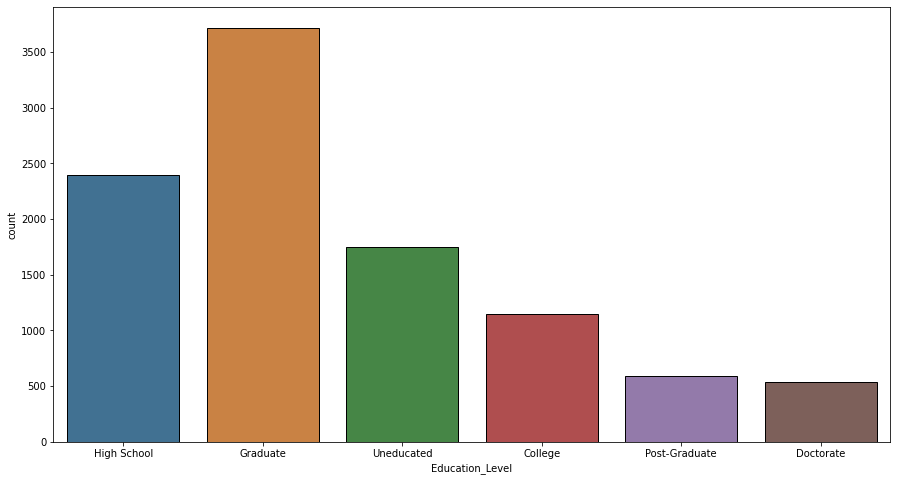

In [83]:
# Fill NaN by using ffill
df.fillna(axis=0,method='ffill',inplace=True)

# Visualize the changed Education_Level again
plt.figure(figsize = (15,8))
sns.countplot(x= df['Education_Level'], edgecolor = 'black', saturation = 0.55)
plt.show()

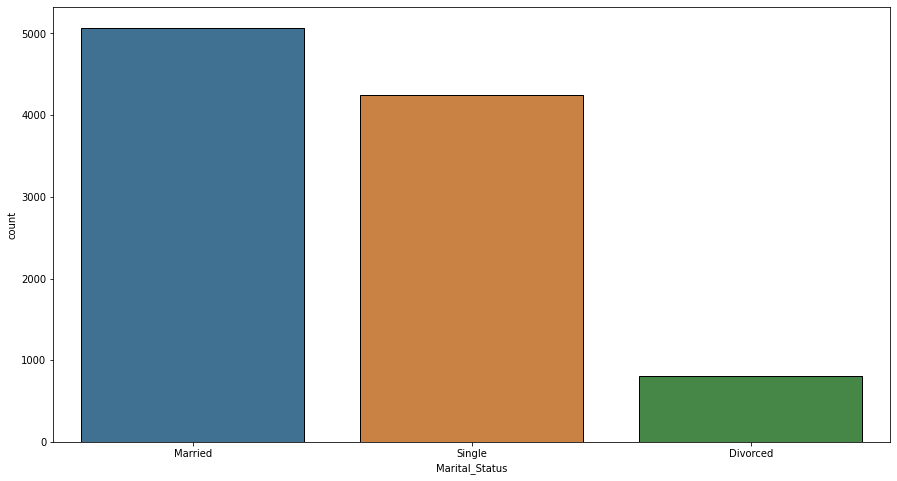

In [84]:
# Visualize the changed Marital_Status again
plt.figure(figsize = (15,8))
sns.countplot(x = df['Marital_Status'], edgecolor = 'black', saturation = 0.55)
plt.show()

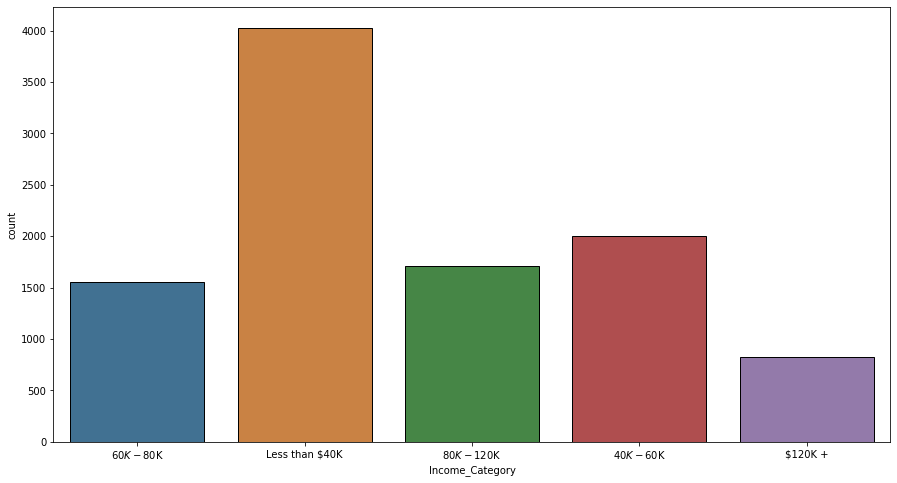

In [85]:
# Visualize the changed Income_Category
plt.figure(figsize = (15,8))
sns.countplot(x = df['Income_Category'], edgecolor = 'black', saturation = 0.55)
plt.show()

**<h3>Handling missing value is done</h3>**

**<h2> Under sampling</h2>**

In the "Attrition Flag" column of this dataset, the "existing" ratio is 85%. <br> Therefore, even if you always predict Existing, the probability of getting it right is 85%, so we will go through the undersampling process of matching the ratio of "existing" and "attritied" in the training dataset and the test dataset.

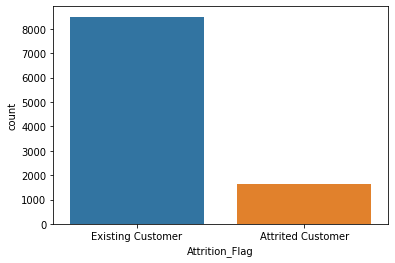

In [86]:
sns.countplot(x = df['Attrition_Flag'])
plt.show()

In [87]:
zero = df.loc[df.Attrition_Flag == 'Existing Customer']
one = df.loc[df.Attrition_Flag == 'Attrited Customer']

In [88]:
balanced_df = pd.concat([one, zero.sample(n=len(one))], axis=0)
df = balanced_df.sample(n=len(balanced_df)).reset_index(drop=True)

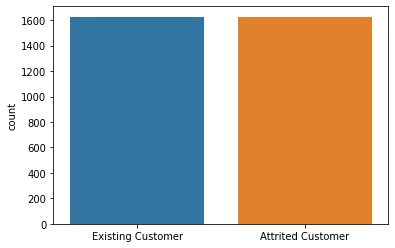

In [89]:
label = df['Attrition_Flag'].values
sns.countplot(x=label)
plt.show()

**<h2>Data Scaling & Encoding</h2>**

In [90]:
# importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [91]:
data = df

In [92]:
# Define function StandardScaler + Label encoding
def Standard_Label(numerical_features, categorical_features):
    # Numerical_features by StandardScaler

    # Independent variable(Target value)
    y = categorical_features.loc[:, ['Attrition_Flag']]

    # Dependent variables
    col_to_scale = numerical_features.columns
    numerical_features[col_to_scale] = StandardScaler().fit_transform(numerical_features[col_to_scale])

    # Categorical feature by Label encoding
    categorical_features = categorical_features.drop(['Attrition_Flag'], axis=1)
    label = LabelEncoder()
    col_to_encode = categorical_features.columns
    for i in range(len(categorical_features.columns)):
        categorical_features[col_to_encode[i]] = label.fit_transform(categorical_features[col_to_encode[i]])

    # pandas dataset X
    X = pd.concat([numerical_features, categorical_features], axis=1)

    Processed_st_label = pd.concat([X, y], axis=1)

    return X, y, Processed_st_label

In [93]:
# Define function StandardScaler + OneHot encoding
def Standard_OneHot(numerical_features, categorical_features):
    # Numerical_features by StandardScaler
    # Independent variable(Target value)
    y = categorical_features.loc[:, ['Attrition_Flag']]

    # Dependent variables
    col_to_scale = numerical_features.columns
    numerical_features[col_to_scale] = StandardScaler().fit_transform(numerical_features[col_to_scale])

    # Categorical feature by OneHot encoding
    categorical_features = categorical_features.drop(['Attrition_Flag'], axis=1)
    # Using pandas.get_dummies
    categorical_features = pd.get_dummies(categorical_features, columns=categorical_features.columns)

    # pandas dataset X
    X = pd.concat([numerical_features, categorical_features], axis=1)

    Processed_st_onehot = pd.concat([X, y], axis=1)

    return X, y, Processed_st_onehot

In [94]:
# Define function MinMaxScaler + Label encoding
def MinMax_Label(numerical_features, categorical_features):
    # Numerical_features by MinMaxScaler
    # Independent variable(Target value)
    y = categorical_features.loc[:, ['Attrition_Flag']]

    # Dependent variables
    col_to_scale = numerical_features.columns
    numerical_features[col_to_scale] = MinMaxScaler().fit_transform(numerical_features[col_to_scale])

    # Categorical feature by Label encoding
    categorical_features = categorical_features.drop(['Attrition_Flag'], axis=1)
    label = LabelEncoder()
    col_to_encode = categorical_features.columns
    for i in range(len(categorical_features.columns)):
        categorical_features[col_to_encode[i]] = label.fit_transform(categorical_features[col_to_encode[i]])

    # pandas dataset X
    X = pd.concat([numerical_features, categorical_features], axis=1)

    Processed_mm_label = pd.concat([X, y], axis=1)

    return X, y, Processed_mm_label

In [95]:
# Define function MinMaxScaler + OneHot encoding
def MinMax_OneHot(numerical_features, categorical_features):
    # Numerical_features by MinMaxScaler
    # Independent variable(Target value)
    y = categorical_features.loc[:, ['Attrition_Flag']]

    # Dependent variables
    col_to_scale = numerical_features.columns
    numerical_features[col_to_scale] = MinMaxScaler().fit_transform(numerical_features[col_to_scale])

    # Categorical feature by OneHot encoding
    categorical_features = categorical_features.drop(['Attrition_Flag'], axis=1)
    # Using pandas.get_dummies
    categorical_features = pd.get_dummies(categorical_features, columns=categorical_features.columns)

    # pandas dataset X
    X = pd.concat([numerical_features, categorical_features], axis=1)

    Processed_mm_oneHot = pd.concat([X, y], axis=1)

    return X, y, Processed_mm_oneHot

In [96]:
# Define function RobustScaler + Label encoding
def Robust_Label(numerical_features, categorical_features):
    # Numerical_features by RobustScaler
    # Independent variable(Target value)
    y = categorical_features.loc[:, ['Attrition_Flag']]

    # Dependent variables
    col_to_scale = numerical_features.columns
    numerical_features[col_to_scale] = RobustScaler().fit_transform(numerical_features[col_to_scale])

    # Categorical feature by Label encoding
    categorical_features = categorical_features.drop(['Attrition_Flag'], axis=1)
    label = LabelEncoder()
    col_to_encode = categorical_features.columns
    for i in range(len(categorical_features.columns)):
        categorical_features[col_to_encode[i]] = label.fit_transform(categorical_features[col_to_encode[i]])

    # pandas dataset X
    X = pd.concat([numerical_features, categorical_features], axis=1)

    Processed_rb_label = pd.concat([X, y], axis=1)

    return X, y, Processed_rb_label

In [97]:
# Define function RobustScaler + OneHot encoding
def Robust_OneHot(numerical_features, categorical_features):
    # Numerical_features by RobustScaler
    # Independent variable(Target value)
    y = categorical_features.loc[:, ['Attrition_Flag']]

    # Dependent variables
    col_to_scale = numerical_features.columns
    numerical_features[col_to_scale] = RobustScaler().fit_transform(numerical_features[col_to_scale])

    # Categorical feature by OneHot encoding
    categorical_features = categorical_features.drop(['Attrition_Flag'], axis=1)
    # Using pandas.get_dummies
    categorical_features = pd.get_dummies(categorical_features, columns=categorical_features.columns)

    # pandas dataset X
    X = pd.concat([numerical_features, categorical_features], axis=1)

    Processed_rb_oneHot = pd.concat([X, y], axis=1)

    return X, y, Processed_rb_oneHot

In [98]:
categorical_features = data.select_dtypes(include=['object'])
categorical_features = categorical_features.copy()
print(categorical_features.head())
print('Categorical features: {}'.format(categorical_features.shape))

      Attrition_Flag Gender Education_Level Marital_Status Income_Category  \
0  Existing Customer      F        Graduate        Married         $120K +   
1  Attrited Customer      M     High School         Single     $60K - $80K   
2  Attrited Customer      F   Post-Graduate         Single  Less than $40K   
3  Attrited Customer      M        Graduate       Divorced     $60K - $80K   
4  Existing Customer      F      Uneducated       Divorced  Less than $40K   

  Card_Category  
0          Blue  
1          Blue  
2          Blue  
3          Blue  
4        Silver  
Categorical features: (3254, 6)


In [99]:
numerical_features = data.select_dtypes(exclude=['object'])
numerical_features = numerical_features.copy()
print(numerical_features.head())
print('numerical_features features: {}'.format(numerical_features.shape))

   Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            60                1              52                         2   
1            45                5              40                         3   
2            45                2              37                         3   
3            50                1              44                         3   
4            47                2              34                         6   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       3                      3       13312.0   
1                       3                      1        1438.3   
2                       3                      1        3036.0   
3                       4                      3        7050.0   
4                       4                      2       13878.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                 1974          11338.0                 0.898   
1   

In [100]:
st_label_X, st_label_y, Processed_st_label = Standard_Label(numerical_features,categorical_features)
# 1: StandardScaling + Label Encoding
Processed_st_label

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
0,1.701315,-1.070149,1.985887,-1.017535,0.514350,0.291491,0.539892,1.141108,0.428181,0.761855,3.370651,2.165674,0.039467,-0.300216,0,2,1,0,0,Existing Customer
1,-0.186371,2.057165,0.492283,-0.387457,0.514350,-1.484750,-0.767052,-1.083659,-0.660806,2.289144,-0.568919,-1.145188,-2.195099,-0.830259,1,3,2,2,0,Attrited Customer
2,-0.186371,-0.288320,0.118882,-0.387457,0.514350,-1.484750,-0.591192,1.753089,-0.761931,0.688250,-0.414939,-0.659595,-0.127413,2.138695,0,4,2,4,0,Attrited Customer
3,0.442858,-1.070149,0.990151,-0.387457,1.538642,0.291491,-0.149369,0.052392,-0.154390,-0.429615,-0.554715,-0.792029,-0.351277,-0.318123,1,2,0,2,0,Attrited Customer
4,0.065321,-0.288320,-0.254519,1.502776,1.538642,-0.596629,0.602192,1.420613,0.463161,0.554843,-0.721931,-0.836174,-1.177537,-0.257240,0,5,0,4,3,Existing Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249,-0.563908,1.275337,-1.374722,0.242621,0.514350,0.291491,-0.585028,0.172985,-0.601548,0.320229,-0.568596,-0.703740,0.556388,0.462615,1,0,1,2,0,Existing Customer
3250,-1.444828,-1.851977,-0.005585,1.502776,0.514350,-0.596629,-0.306880,0.611402,-0.366364,0.196022,-0.350699,0.664750,-0.188467,0.129548,1,3,0,1,0,Existing Customer
3251,0.065321,2.057165,0.492283,0.872698,1.538642,2.067733,-0.539899,-1.083659,-0.433795,-0.926444,-0.645425,-0.659595,-1.002517,-0.830259,0,5,2,4,0,Attrited Customer
3252,-0.563908,-0.288320,-1.623655,-0.387457,0.514350,0.291491,-0.713040,0.801871,-0.790862,0.472038,-0.980501,-0.924464,1.919921,2.274787,0,2,1,4,0,Attrited Customer


In [101]:
st_oneHot_X,st_oneHot_y, Processed_st_oneHot = Standard_OneHot(numerical_features,categorical_features)
# 2: StandardScaling + Onehot Encoding
Processed_st_oneHot

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Attrition_Flag
0,1.701315,-1.070149,1.985887,-1.017535,0.514350,0.291491,0.539892,1.141108,0.428181,0.761855,...,1,0,0,0,0,1,0,0,0,Existing Customer
1,-0.186371,2.057165,0.492283,-0.387457,0.514350,-1.484750,-0.767052,-1.083659,-0.660806,2.289144,...,0,0,1,0,0,1,0,0,0,Attrited Customer
2,-0.186371,-0.288320,0.118882,-0.387457,0.514350,-1.484750,-0.591192,1.753089,-0.761931,0.688250,...,0,0,0,0,1,1,0,0,0,Attrited Customer
3,0.442858,-1.070149,0.990151,-0.387457,1.538642,0.291491,-0.149369,0.052392,-0.154390,-0.429615,...,0,0,1,0,0,1,0,0,0,Attrited Customer
4,0.065321,-0.288320,-0.254519,1.502776,1.538642,-0.596629,0.602192,1.420613,0.463161,0.554843,...,0,0,0,0,1,0,0,0,1,Existing Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249,-0.563908,1.275337,-1.374722,0.242621,0.514350,0.291491,-0.585028,0.172985,-0.601548,0.320229,...,0,0,1,0,0,1,0,0,0,Existing Customer
3250,-1.444828,-1.851977,-0.005585,1.502776,0.514350,-0.596629,-0.306880,0.611402,-0.366364,0.196022,...,0,1,0,0,0,1,0,0,0,Existing Customer
3251,0.065321,2.057165,0.492283,0.872698,1.538642,2.067733,-0.539899,-1.083659,-0.433795,-0.926444,...,0,0,0,0,1,1,0,0,0,Attrited Customer
3252,-0.563908,-0.288320,-1.623655,-0.387457,0.514350,0.291491,-0.713040,0.801871,-0.790862,0.472038,...,0,0,0,0,1,1,0,0,0,Attrited Customer


In [102]:
mm_label_X, mm_label_y, Processed_mm_label = MinMax_Label(numerical_features,categorical_features)
# 3: MinMaxScaling + Label Encoding
Processed_mm_label

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
0,0.772727,0.2,0.906977,0.2,0.500000,0.500000,0.358964,0.784267,0.328427,0.335701,0.807405,0.744186,0.183702,0.148148,0,2,1,0,0,Existing Customer
1,0.431818,1.0,0.627907,0.4,0.500000,0.166667,0.000000,0.000000,0.041587,0.459813,0.094721,0.162791,0.029964,0.000000,1,3,2,2,0,Attrited Customer
2,0.431818,0.4,0.558140,0.4,0.500000,0.166667,0.048301,1.000000,0.014951,0.329720,0.122577,0.248062,0.172221,0.829830,0,4,2,4,0,Attrited Customer
3,0.545455,0.2,0.720930,0.4,0.666667,0.500000,0.169652,0.400477,0.174978,0.238879,0.097290,0.224806,0.156819,0.143143,1,2,0,2,0,Attrited Customer
4,0.477273,0.4,0.488372,1.0,0.666667,0.333333,0.376075,0.882797,0.337641,0.318879,0.067040,0.217054,0.099972,0.160160,0,5,0,4,3,Existing Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249,0.363636,0.8,0.279070,0.6,0.500000,0.500000,0.049994,0.442988,0.057196,0.299813,0.094779,0.240310,0.219266,0.361361,1,0,1,2,0,Existing Customer
3250,0.204545,0.0,0.534884,1.0,0.500000,0.333333,0.126390,0.597537,0.119144,0.289720,0.134198,0.480620,0.168020,0.268268,1,3,0,1,0,Existing Customer
3251,0.477273,1.0,0.627907,0.8,0.666667,0.833333,0.062389,0.000000,0.101382,0.198505,0.080881,0.248062,0.112013,0.000000,0,5,2,4,0,Attrited Customer
3252,0.363636,0.4,0.232558,0.4,0.500000,0.500000,0.014835,0.664680,0.007331,0.312150,0.020264,0.201550,0.313078,0.867868,0,2,1,4,0,Attrited Customer


In [103]:
mm_oneHot_X, mm_oneHot_y, Processed_mm_oneHot = MinMax_OneHot(numerical_features,categorical_features)
# 4: MinMaxScaling + OneHot Encoding
Processed_mm_oneHot

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Attrition_Flag
0,0.772727,0.2,0.906977,0.2,0.500000,0.500000,0.358964,0.784267,0.328427,0.335701,...,1,0,0,0,0,1,0,0,0,Existing Customer
1,0.431818,1.0,0.627907,0.4,0.500000,0.166667,0.000000,0.000000,0.041587,0.459813,...,0,0,1,0,0,1,0,0,0,Attrited Customer
2,0.431818,0.4,0.558140,0.4,0.500000,0.166667,0.048301,1.000000,0.014951,0.329720,...,0,0,0,0,1,1,0,0,0,Attrited Customer
3,0.545455,0.2,0.720930,0.4,0.666667,0.500000,0.169652,0.400477,0.174978,0.238879,...,0,0,1,0,0,1,0,0,0,Attrited Customer
4,0.477273,0.4,0.488372,1.0,0.666667,0.333333,0.376075,0.882797,0.337641,0.318879,...,0,0,0,0,1,0,0,0,1,Existing Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249,0.363636,0.8,0.279070,0.6,0.500000,0.500000,0.049994,0.442988,0.057196,0.299813,...,0,0,1,0,0,1,0,0,0,Existing Customer
3250,0.204545,0.0,0.534884,1.0,0.500000,0.333333,0.126390,0.597537,0.119144,0.289720,...,0,1,0,0,0,1,0,0,0,Existing Customer
3251,0.477273,1.0,0.627907,0.8,0.666667,0.833333,0.062389,0.000000,0.101382,0.198505,...,0,0,0,0,1,1,0,0,0,Attrited Customer
3252,0.363636,0.4,0.232558,0.4,0.500000,0.500000,0.014835,0.664680,0.007331,0.312150,...,0,0,0,0,1,1,0,0,0,Attrited Customer


In [104]:
rb_label_X, rb_label_y, Processed_rb_label = Robust_Label(numerical_features,categorical_features)
# 5: RobustScaling + Label Encoding
Processed_rb_label

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
0,1.272727,-0.5,2.000,-0.666667,0.0,0.0,1.084982,0.606895,0.957243,0.681597,4.567170,1.636364,0.054422,0.120283,0,2,1,0,0,Existing Customer
1,-0.090909,1.5,0.500,-0.333333,0.0,-2.0,-0.343261,-0.561326,-0.240333,1.974684,-0.219651,-0.636364,-1.812925,-0.228774,1,3,2,2,0,Attrited Customer
2,-0.090909,0.0,0.125,-0.333333,0.0,-2.0,-0.151080,0.928244,-0.351541,0.619279,-0.032555,-0.303030,-0.085034,1.726415,0,4,2,4,0,Attrited Customer
3,0.363636,-0.5,1.000,-0.333333,1.0,0.0,0.331750,0.035212,0.316581,-0.327167,-0.202393,-0.393939,-0.272109,0.108491,1,2,0,2,0,Attrited Customer
4,0.090909,0.0,-0.250,0.666667,1.0,-1.0,1.153064,0.753662,0.995712,0.506329,-0.405570,-0.424242,-0.962585,0.148585,0,5,0,4,3,Existing Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249,-0.363636,1.0,-1.375,0.000000,0.0,0.0,-0.144344,0.098535,-0.175166,0.307692,-0.219259,-0.333333,0.486395,0.622642,1,0,1,2,0,Existing Customer
3250,-1.000000,-1.0,0.000,0.666667,0.0,-1.0,0.159620,0.328747,0.083470,0.202532,0.045499,0.606061,-0.136054,0.403302,1,3,0,1,0,Existing Customer
3251,0.090909,1.5,0.500,0.333333,1.0,2.0,-0.095026,-0.561326,0.009315,-0.747809,-0.312610,-0.303030,-0.816327,-0.228774,0,5,2,4,0,Attrited Customer
3252,-0.363636,0.0,-1.625,-0.333333,0.0,0.0,-0.284236,0.428762,-0.383357,0.436222,-0.719749,-0.484848,1.625850,1.816038,0,2,1,4,0,Attrited Customer


In [105]:
rb_oneHot_X, rb_oneHot_y, Processed_rb_oneHot = Robust_OneHot(numerical_features,categorical_features)
# 5: RobustScaling + OneHot Encoding
Processed_rb_oneHot

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Attrition_Flag
0,1.272727,-0.5,2.000,-0.666667,0.0,0.0,1.084982,0.606895,0.957243,0.681597,...,1,0,0,0,0,1,0,0,0,Existing Customer
1,-0.090909,1.5,0.500,-0.333333,0.0,-2.0,-0.343261,-0.561326,-0.240333,1.974684,...,0,0,1,0,0,1,0,0,0,Attrited Customer
2,-0.090909,0.0,0.125,-0.333333,0.0,-2.0,-0.151080,0.928244,-0.351541,0.619279,...,0,0,0,0,1,1,0,0,0,Attrited Customer
3,0.363636,-0.5,1.000,-0.333333,1.0,0.0,0.331750,0.035212,0.316581,-0.327167,...,0,0,1,0,0,1,0,0,0,Attrited Customer
4,0.090909,0.0,-0.250,0.666667,1.0,-1.0,1.153064,0.753662,0.995712,0.506329,...,0,0,0,0,1,0,0,0,1,Existing Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249,-0.363636,1.0,-1.375,0.000000,0.0,0.0,-0.144344,0.098535,-0.175166,0.307692,...,0,0,1,0,0,1,0,0,0,Existing Customer
3250,-1.000000,-1.0,0.000,0.666667,0.0,-1.0,0.159620,0.328747,0.083470,0.202532,...,0,1,0,0,0,1,0,0,0,Existing Customer
3251,0.090909,1.5,0.500,0.333333,1.0,2.0,-0.095026,-0.561326,0.009315,-0.747809,...,0,0,0,0,1,1,0,0,0,Attrited Customer
3252,-0.363636,0.0,-1.625,-0.333333,0.0,0.0,-0.284236,0.428762,-0.383357,0.436222,...,0,0,0,0,1,1,0,0,0,Attrited Customer


# 5. Data Analysis

**<h2> 1) Regression: </h2>**

**<h2> Logistic Regression </h2>**

In [106]:
# importing necessary libraries
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [107]:
LogisticRegression_score = [[],[]]
LogisticRegression_score = pd.DataFrame(columns=['Scaler','Encoder','Algorithm','Train_score','Test_score'])

In [108]:
# Define function
def LogisticRegressor(X_train, X_test, y_train, y_test):
    reg = LogisticRegression()
    reg.fit(X_train, y_train)
    train_score = reg.score(X_train, y_train)
    test_score = reg.score(X_test, y_test)


    return train_score, test_score

In [109]:
# Split (Standard Scaling + Label Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(st_label_X, st_label_y, test_size=0.2, random_state=1)

SLK_train_score, SLK_test_score = LogisticRegressor(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
LogisticRegression_score.loc[len(LogisticRegression_score)]=['Standard','Label','LogisticRegression', SLK_train_score, SLK_test_score]

In [110]:
# Split (Standard Scaling + OneHot Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(st_oneHot_X, st_oneHot_y, test_size=0.2, random_state=1)

SOK_train_score, SOK_test_score = LogisticRegressor(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
LogisticRegression_score.loc[len(LogisticRegression_score)]=['Standard','OneHot','LogisticRegression',SOK_train_score,SOK_test_score]

In [111]:
# Split (MinMax + Label Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(mm_label_X, mm_label_y, test_size=0.2, random_state=1)

MLK_train_score, MLK_test_score = LogisticRegressor(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
LogisticRegression_score.loc[len(LogisticRegression_score)]=['Min-Max','Label','LogisticRegression',MLK_train_score, MLK_test_score]

c:\users\user\pycharmprojects\datascience\wk2\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [112]:
# Split (MinMax + OneHot Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(mm_oneHot_X, mm_oneHot_y, test_size=0.2, random_state=1)

MOK_train_score, MOK_test_score = LogisticRegressor(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
LogisticRegression_score.loc[len(LogisticRegression_score)]=['Min-Max','OneHot','LogisticRegression', MOK_train_score, MOK_test_score]

In [113]:
# Split (Robust + Label Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(rb_label_X, rb_label_y, test_size=0.2, random_state=1)

RLK_train_score, RLK_test_score = LogisticRegressor(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
LogisticRegression_score.loc[len(LogisticRegression_score)]=['Robust','Label','LogisticRegression',RLK_train_score,RLK_test_score]

In [114]:
# Split (Robust + OneHot Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(mm_oneHot_X, mm_oneHot_y, test_size=0.2, random_state=1)

ROK_train_score, ROK_test_score = LogisticRegressor(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
LogisticRegression_score.loc[len(LogisticRegression_score)]=['Robust','OneHot','LogisticRegression',ROK_train_score, ROK_test_score]

In [115]:
LogisticRegression_score.sort_values(by=['Test_score'],ascending=[False])

,Scaler,Encoder,Algorithm,Train_score,Test_score
1,Standard,OneHot,LogisticRegression,0.842105,0.872504
0,Standard,Label,LogisticRegression,0.842489,0.867896
4,Robust,Label,LogisticRegression,0.842105,0.867896
3,Min-Max,OneHot,LogisticRegression,0.838264,0.860215
5,Robust,OneHot,LogisticRegression,0.838264,0.860215
2,Min-Max,Label,LogisticRegression,0.841337,0.858679


**<h2> 2) Classification: </h2>**

**<h2> 2-1) K - Nearest Neighbors </h2>**

In [116]:
classification_score = pd.DataFrame(columns=['Scaler','Encoder','Algorithm','Train_score','Test_score'])
knn_score= pd.DataFrame(columns=['Scaler','Encoder','Algorithm','Train_score','Test_score'])

In [117]:
# Define function
def KNNClassifier(X_train, X_test, y_train, y_test):
    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(X_train, y_train)
    train_score = classifier.score(X_train, y_train)
    test_score = classifier.score(X_test, y_test)

    k_list = range(1, 101)
    accuracies = []
    for k in k_list:
        classifier = KNeighborsClassifier(n_neighbors=k)
        classifier.fit(X_train, y_train)
        accuracies.append(classifier.score(X_test, y_test))

    plt.figure(figsize=(10, 10))
    plt.plot(k_list, accuracies)
    plt.xlabel("k")
    plt.ylabel("Validation Accuracy")
    plt.title("Classifier Accuracy")
    plt.show()

    return train_score, test_score

In [118]:
def DTClassifier(X_train, X_test, y_train, y_test):
    classifier = DecisionTreeClassifier(max_depth=7, random_state=1)
    classifier.fit(X_train, y_train)

    train_score = classifier.score(X_train, y_train)
    test_score = classifier.score(X_test, y_test)

    k_list = range(1, 101)
    accuracies = []
    for k in k_list:
        classifier = DecisionTreeClassifier(max_depth=100)
        classifier.fit(X_train, y_train)
        accuracies.append(classifier.score(X_test, y_test))

    plt.figure(figsize=(10, 10))
    plt.plot(k_list, accuracies)
    plt.xlabel("k")
    plt.ylabel("Validation Accuracy")
    plt.title("Classifier Accuracy")
    plt.show()

    return train_score, test_score

In [119]:
# Split (Standard Scaling + Label Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(st_label_X, st_label_y, test_size=0.2, random_state=1)

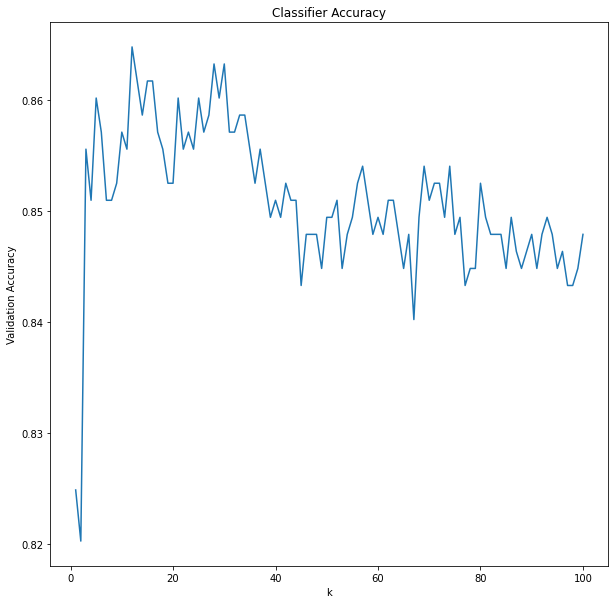

In [120]:
# Classifying by K-Nearest Neighbors : Standard Scaling + Label Encoding
SLK_train_score, SLK_test_score = KNNClassifier(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
classification_score.loc[len(classification_score)]=['Standard','Label','KNNClassifier', SLK_train_score, SLK_test_score]
knn_score.loc[len(knn_score)]=['Standard','Label','KNNClassifier', SLK_train_score, SLK_test_score]

In [121]:
# Split (Standard Scaling + OneHot Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(st_oneHot_X, st_oneHot_y, test_size=0.2, random_state=1)

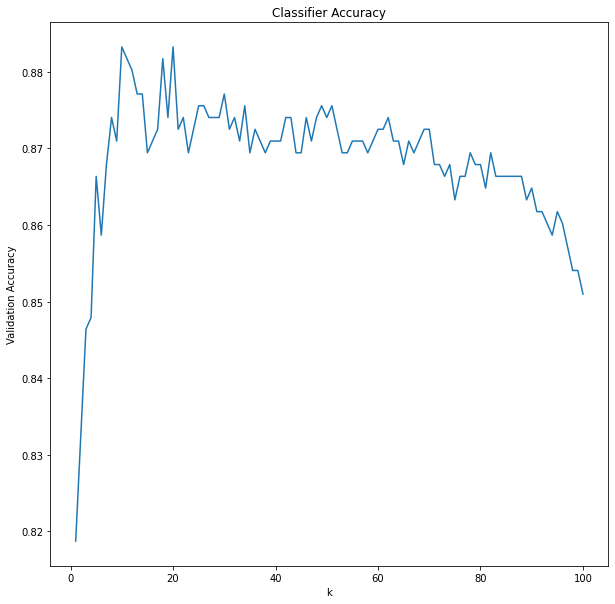

In [122]:
# Classifying by K-Nearest Neighbors : Standard Scaling + OneHot Encoding
SOK_train_score, SOK_test_score = KNNClassifier(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
classification_score.loc[len(classification_score)]=['Standard','OneHot','KNNClassifier',SOK_train_score,SOK_test_score]
knn_score.loc[len(knn_score)]=['Standard','OneHot','KNNClassifier',SOK_train_score,SOK_test_score]

In [123]:
# Split (MinMax + Label Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(mm_label_X, mm_label_y, test_size=0.2, random_state=1)

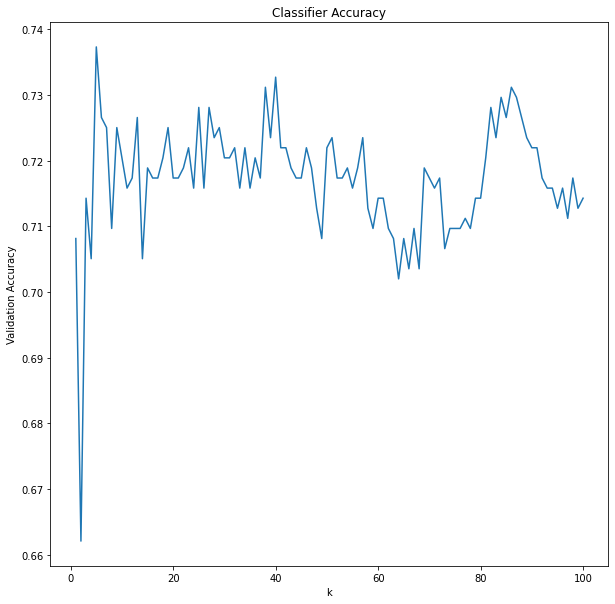

In [124]:
# Classifying by K-Nearest Neighbors : MinMax Scaling + Label Encoding
MLK_train_score, MLK_test_score = KNNClassifier(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
classification_score.loc[len(classification_score)]=['Min-Max','Label','KNNClassifier',MLK_train_score, MLK_test_score]
knn_score.loc[len(knn_score)]=['Min-Max','Label','KNNClassifier',MLK_train_score, MLK_test_score]

In [125]:
# Split (MinMax + OneHot Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(mm_oneHot_X, mm_oneHot_y, test_size=0.2, random_state=1)

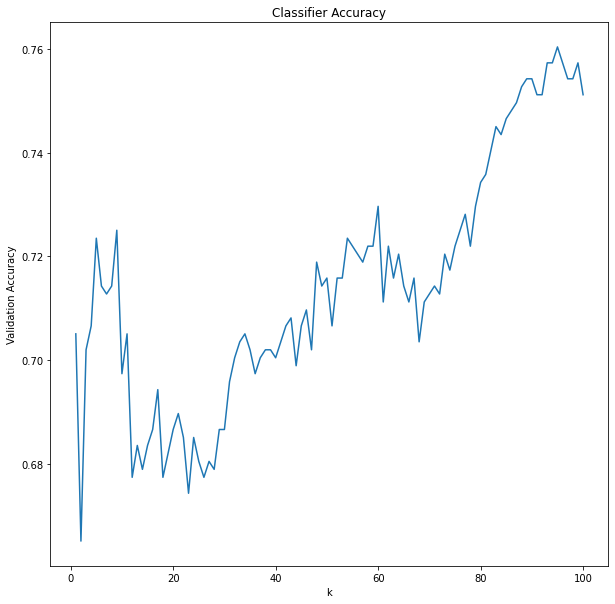

In [126]:
# Classifying by K-Nearest Neighbors : MinMax Scaling + OneHot Encoding
MOK_train_score, MOK_test_score = KNNClassifier(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
classification_score.loc[len(classification_score)]=['Min-Max','OneHot','KNNClassifier', MOK_train_score, MOK_test_score]
knn_score.loc[len(knn_score)]=['Min-Max','OneHot','KNNClassifier', MOK_train_score, MOK_test_score]

In [127]:
# Split (Robust + Label Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(rb_label_X, rb_label_y, test_size=0.2, random_state=1)

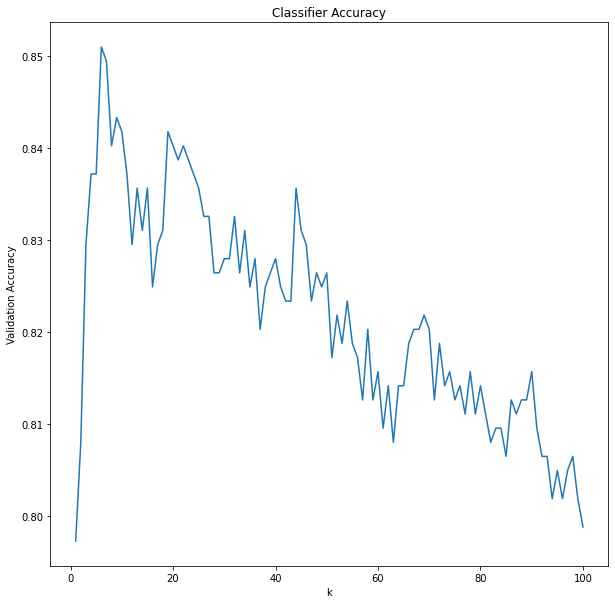

In [128]:
# Classifying by K-Nearest Neighbors : Robust Scaling + Label Encoding
RLK_train_score, RLK_test_score = KNNClassifier(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
classification_score.loc[len(classification_score)]=['Robust','Label','KNNClassifier',RLK_train_score,RLK_test_score]
knn_score.loc[len(knn_score)]=['Robust','Label','KNNClassifier',RLK_train_score,RLK_test_score]

In [129]:
# Split (Robust + OneHot Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(mm_oneHot_X, mm_oneHot_y, test_size=0.2, random_state=1)

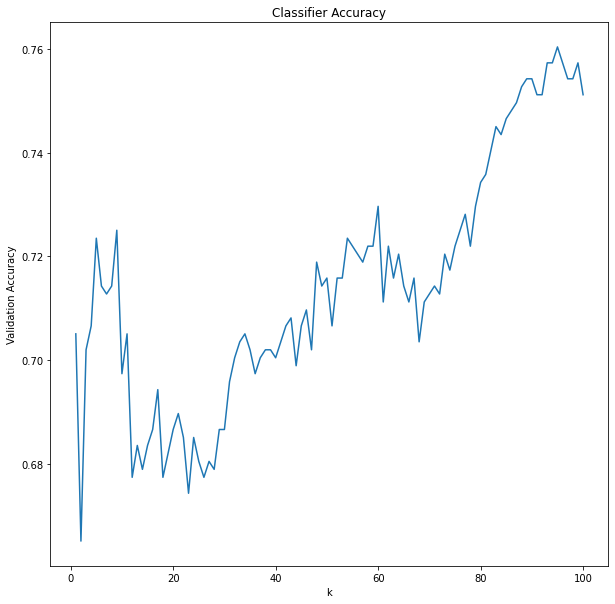

In [130]:
# Classifying by K-Nearest Neighbors : Robust Scaling + OneHot Encoding
ROK_train_score, ROK_test_score = KNNClassifier(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
classification_score.loc[len(classification_score)]=['Robust','OneHot','KNNClassifier',ROK_train_score, ROK_test_score]
knn_score.loc[len(knn_score)]=['Robust','OneHot','KNNClassifier',ROK_train_score, ROK_test_score]

In [131]:
knn_score.sort_values(by=['Test_score'],ascending=[False])

,Scaler,Encoder,Algorithm,Train_score,Test_score
1,Standard,OneHot,KNNClassifier,0.909720,0.866359
0,Standard,Label,KNNClassifier,0.903957,0.860215
4,Robust,Label,KNNClassifier,0.895889,0.837174
2,Min-Max,Label,KNNClassifier,0.814061,0.737327
3,Min-Max,OneHot,KNNClassifier,0.811756,0.723502
5,Robust,OneHot,KNNClassifier,0.811756,0.723502


**<h2> 2-2) Decision Tree </h2>**

In [132]:
dt_score= pd.DataFrame(columns=['Scaler','Encoder','Algorithm','Train_score','Test_score'])

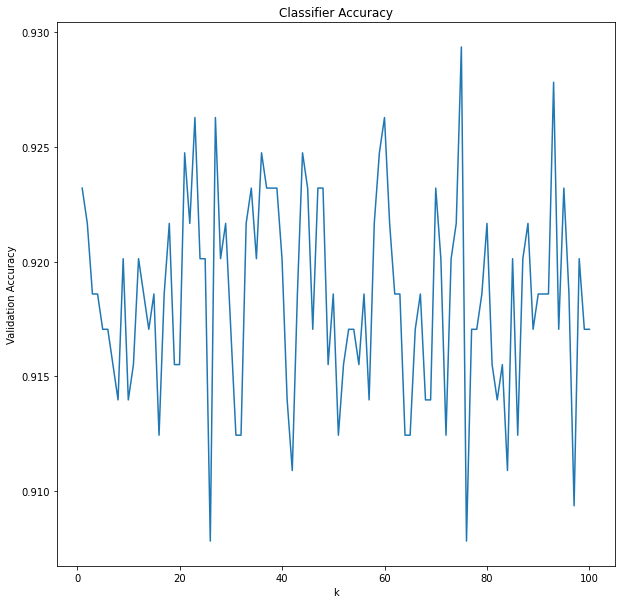

In [133]:
# Split (Standard Scaling + Label Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(st_label_X, st_label_y, test_size=0.2, random_state=1)
# Classifying by DecisionTree : Standard Scaling + Label Encoding
SLD_train_score, SLD_test_score = DTClassifier(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
classification_score.loc[len(classification_score)]=['Standard','Label','DTClassifier', SLD_train_score, SLD_test_score]
dt_score.loc[len(dt_score)]=['Standard','Label','DTClassifier', SLD_train_score, SLD_test_score]

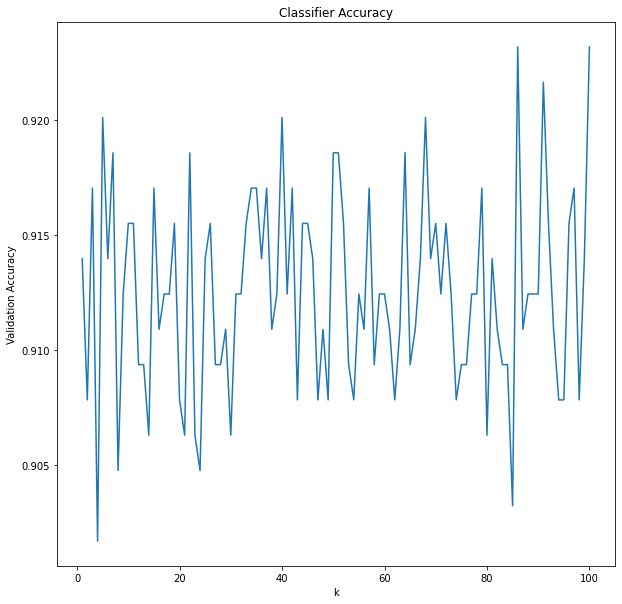

In [134]:
# Split (Standard Scaling + OneHot Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(st_oneHot_X, st_oneHot_y, test_size=0.2, random_state=1)
# Classifying by DecisionTree : Standard Scaling + OneHot Encoding
SOD_train_score, SOD_test_score = DTClassifier(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
classification_score.loc[len(classification_score)]=['Standard','OneHot','DTClassifier', SOD_train_score, SOD_test_score]
dt_score.loc[len(dt_score)]=['Standard','OneHot','DTClassifier', SOD_train_score, SOD_test_score]

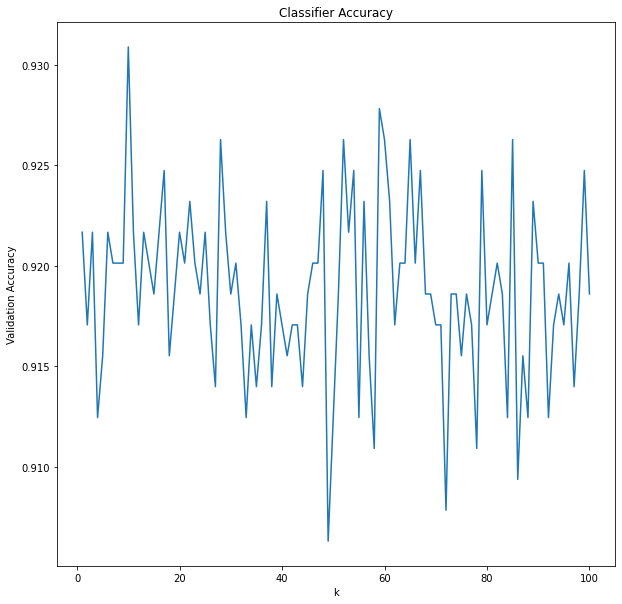

In [135]:
# Split (MinMax + Label Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(mm_label_X, mm_label_y, test_size=0.2, random_state=1)
# Classifying by DecisionTree : MinMax Scaling + Label Encoding
MLD_train_score, MLD_test_score = DTClassifier(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
classification_score.loc[len(classification_score)]=['Min-Max','Label','DTClassifier', MLD_train_score, MLD_test_score]
dt_score.loc[len(dt_score)]=['Min-Max','Label','DTClassifier', MLD_train_score, MLD_test_score]

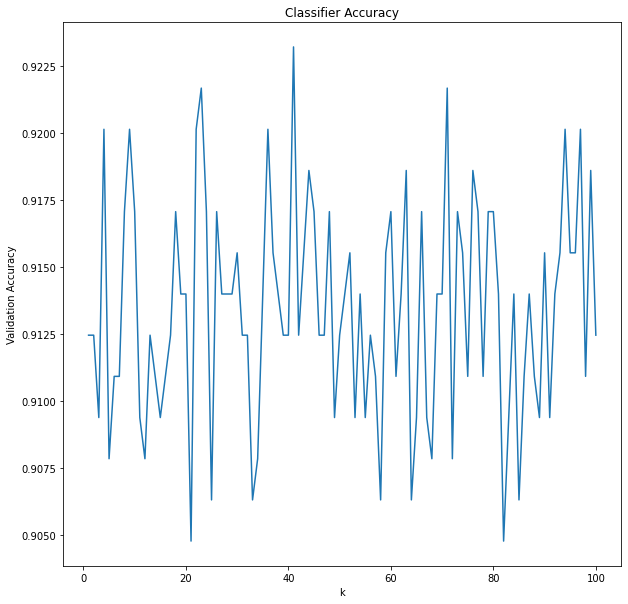

In [136]:
# Split (MinMax + OneHot Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(mm_oneHot_X, mm_oneHot_y, test_size=0.2, random_state=1)
# Classifying by DecisionTree : MinMax Scaling + OneHot Encoding
MOD_train_score, MOD_test_score = DTClassifier(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
classification_score.loc[len(classification_score)]=['Min-Max','OneHot','DTClassifier', MOD_train_score, MOD_test_score]
dt_score.loc[len(dt_score)]=['Min-Max','OneHot','DTClassifier', MOD_train_score, MOD_test_score]

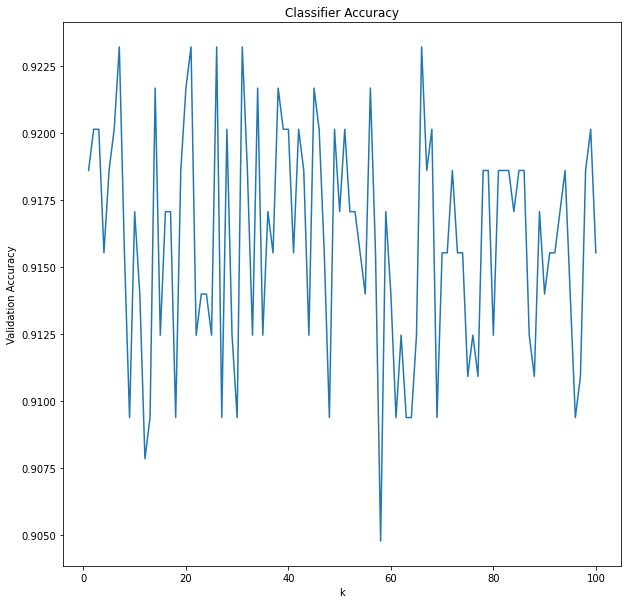

In [137]:
# Split (Robust + Label Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(rb_label_X, rb_label_y, test_size=0.2, random_state=1)
# Classifying by DecisionTree : Robust Scaling + Label Encoding
RLD_train_score, RLD_test_score = DTClassifier(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
classification_score.loc[len(classification_score)]=['Robust','Label','DTClassifier', RLD_train_score, RLD_test_score]
dt_score.loc[len(dt_score)]=['Robust','Label','DTClassifier', RLD_train_score, RLD_test_score]

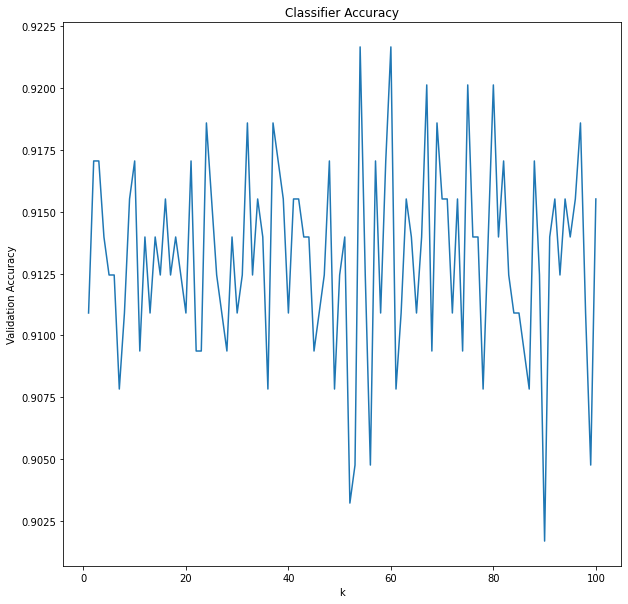

In [138]:
# Split (Robust + OneHot Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(mm_oneHot_X, mm_oneHot_y, test_size=0.2, random_state=1)
# Classifying by DecisionTree : Robust Scaling + OneHot Encoding
ROD_train_score, ROD_test_score = DTClassifier(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
classification_score.loc[len(classification_score)]=['Robust','OneHot','DTClassifier', ROD_train_score, ROD_test_score]
dt_score.loc[len(dt_score)]=['Robust','OneHot','DTClassifier', ROD_train_score, ROD_test_score]

In [139]:
dt_score.sort_values(by=['Test_score'],ascending=[False])

,Scaler,Encoder,Algorithm,Train_score,Test_score
1,Standard,OneHot,DTClassifier,0.958509,0.915515
3,Min-Max,OneHot,DTClassifier,0.958509,0.915515
5,Robust,OneHot,DTClassifier,0.958509,0.915515
0,Standard,Label,DTClassifier,0.957357,0.912442
2,Min-Max,Label,DTClassifier,0.957357,0.912442
4,Robust,Label,DTClassifier,0.957357,0.909370


In [140]:
classification_score.sort_values(by=['Test_score'],ascending=[False])

,Scaler,Encoder,Algorithm,Train_score,Test_score
7,Standard,OneHot,DTClassifier,0.958509,0.915515
9,Min-Max,OneHot,DTClassifier,0.958509,0.915515
11,Robust,OneHot,DTClassifier,0.958509,0.915515
6,Standard,Label,DTClassifier,0.957357,0.912442
8,Min-Max,Label,DTClassifier,0.957357,0.912442
10,Robust,Label,DTClassifier,0.957357,0.909370
1,Standard,OneHot,KNNClassifier,0.909720,0.866359
0,Standard,Label,KNNClassifier,0.903957,0.860215
4,Robust,Label,KNNClassifier,0.895889,0.837174
2,Min-Max,Label,KNNClassifier,0.814061,0.737327


In [141]:
result = (pd.concat([LogisticRegression_score,classification_score]))
result.sort_values(by=['Test_score'],axis = 0, ascending=[False])

,Scaler,Encoder,Algorithm,Train_score,Test_score
11,Robust,OneHot,DTClassifier,0.958509,0.915515
9,Min-Max,OneHot,DTClassifier,0.958509,0.915515
7,Standard,OneHot,DTClassifier,0.958509,0.915515
8,Min-Max,Label,DTClassifier,0.957357,0.912442
6,Standard,Label,DTClassifier,0.957357,0.912442
10,Robust,Label,DTClassifier,0.957357,0.909370
1,Standard,OneHot,LogisticRegression,0.842105,0.872504
0,Standard,Label,LogisticRegression,0.842489,0.867896
4,Robust,Label,LogisticRegression,0.842105,0.867896
1,Standard,OneHot,KNNClassifier,0.909720,0.866359


# 6. Evaluation

**<h2> k-Fold Cross Validation </h2>**

In [142]:
# (Standard + Label) data
kf_X_sl = Processed_st_label.drop('Attrition_Flag', axis=1)
kf_y_sl = Processed_st_label['Attrition_Flag']

# (Standard + OneHot) data
kf_X_so = Processed_st_oneHot.drop('Attrition_Flag', axis=1)
kf_y_so = Processed_st_oneHot['Attrition_Flag']

# (Min-Max + Label) data
kf_X_ml = Processed_mm_label.drop('Attrition_Flag', axis=1)
kf_y_ml = Processed_mm_label['Attrition_Flag']

# (Min-Max + OneHot) data
kf_X_mo = Processed_mm_oneHot.drop('Attrition_Flag', axis=1)
kf_y_mo = Processed_mm_oneHot['Attrition_Flag']

# (Robust + Label) data
kf_X_rl = Processed_rb_label.drop('Attrition_Flag', axis=1)
kf_y_rl = Processed_rb_label['Attrition_Flag']

# (Robust + OneHot) data
kf_X_ro = Processed_rb_oneHot.drop('Attrition_Flag', axis=1)
kf_y_ro = Processed_rb_oneHot['Attrition_Flag']

**K-Nearest Neighbors Classification using K fold validation**

In [143]:
from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors = 5)
# (Standard + Label) data
cv_scores = cross_val_score(knn_cv, kf_X_sl, kf_y_sl, cv = 5)
print(cv_scores)
# Accuracy of Predicted Values
print('KNN Classifier: K-fold cross validation scores mean for (Standard + Label) : {}'.format(np.mean(cv_scores)))
print()

# (Standard + OneHot) data
cv_scores = cross_val_score(knn_cv, kf_X_so, kf_y_so, cv = 5)
print(cv_scores)
# Accuracy of Predicted Values
print('KNN Classifier: K-fold cross validation scores mean for (Standard + OneHot) : {}'.format(np.mean(cv_scores)))
print()

# (Min-Max + Label) data
cv_scores = cross_val_score(knn_cv, kf_X_ml, kf_y_ml, cv = 5)
print(cv_scores)
# Accuracy of Predicted Values
print('KNN Classifier: K-fold cross validation scores mean for (Min-Max + Label) : {}'.format(np.mean(cv_scores)))
print()

# (Min-Max + OneHot) data
cv_scores = cross_val_score(knn_cv, kf_X_mo, kf_y_mo, cv = 5)
print(cv_scores)
# Accuracy of Predicted Values
print('KNN Classifier: K-fold cross validation scores mean for (Min-Max + OneHot) : {}'.format(np.mean(cv_scores)))
print()

# (Robust + Label) data
cv_scores = cross_val_score(knn_cv, kf_X_rl, kf_y_rl, cv = 5)
print(cv_scores)
# Accuracy of Predicted Values
print('KNN AClassifier K-fold cross validation scores mean for (Robust + Label) : {}'.format(np.mean(cv_scores)))
print()

# (Robust + OneHot) data
cv_scores = cross_val_score(knn_cv, kf_X_ro, kf_y_ro, cv = 5)
print(cv_scores)
# Accuracy of Predicted Values
print('KNN Classifier: K-fold cross validation scores mean for (Robust + OneHot) : {}'.format(np.mean(cv_scores)))

[0.83410138 0.82949309 0.84946237 0.85867896 0.86615385]
KNN Classifier: K-fold cross validation scores mean for (Standard + Label) : 0.8475779274488952

[0.88018433 0.84639017 0.86175115 0.87711214 0.87692308]
KNN Classifier: K-fold cross validation scores mean for (Standard + OneHot) : 0.8684721729883019

[0.70967742 0.7250384  0.70967742 0.73886329 0.72461538]
KNN Classifier: K-fold cross validation scores mean for (Min-Max + Label) : 0.7215743826066406

[0.69738863 0.72043011 0.69892473 0.7311828  0.70307692]
KNN Classifier: K-fold cross validation scores mean for (Min-Max + OneHot) : 0.7102006380716058

[0.83563748 0.83563748 0.83563748 0.85407066 0.84307692]
KNN AClassifier K-fold cross validation scores mean for (Robust + Label) : 0.8408120051991019

[0.84792627 0.85714286 0.83717358 0.86021505 0.84307692]
KNN Classifier: K-fold cross validation scores mean for (Robust + OneHot) : 0.8491069360746779


**Decision Tree Classification using K fold validation**

In [144]:
dt_cv = DecisionTreeClassifier(max_depth=7, random_state=1)
# (Standard + Label) data
cv_scores = cross_val_score(dt_cv, kf_X_sl, kf_y_sl, cv = 5)
print(cv_scores)
# Accuracy of Predicted Values
print('Decision Tree Classifier: K-fold cross validation scores mean for (Standard + Label) : {}'.format(np.mean(cv_scores)))
print()

# (Standard + OneHot) data
cv_scores = cross_val_score(dt_cv, kf_X_so, kf_y_so, cv = 5)
print(cv_scores)
# Accuracy of Predicted Values
print('Decision Tree Classifier: K-fold cross validation scores mean for (Standard + OneHot) : {}'.format(np.mean(cv_scores)))
print()

# (Min-Max + Label) data
cv_scores = cross_val_score(dt_cv, kf_X_ml, kf_y_ml, cv = 5)
print(cv_scores)
# Accuracy of Predicted Values
print('Decision Tree Classifier: K-fold cross validation scores mean for (Min-Max + Label) : {}'.format(np.mean(cv_scores)))
print()

# (Min-Max + OneHot) data
cv_scores = cross_val_score(dt_cv, kf_X_mo, kf_y_mo, cv = 5)
print(cv_scores)
# Accuracy of Predicted Values
print('Decision Tree Classifier: K-fold cross validation scores mean for (Min-Max + OneHot) : {}'.format(np.mean(cv_scores)))
print()

# (Robust + Label) data
cv_scores = cross_val_score(dt_cv, kf_X_rl, kf_y_rl, cv = 5)
print(cv_scores)
# Accuracy of Predicted Values
print('Decision Tree Classifier: K-fold cross validation scores mean for (Robust + Label) : {}'.format(np.mean(cv_scores)))
print()

# (Robust + OneHot) data
cv_scores = cross_val_score(dt_cv, kf_X_ro, kf_y_ro, cv = 5)
print(cv_scores)
# Accuracy of Predicted Values
print('Decision Tree Classifier: K-fold cross validation scores mean for (Robust + OneHot) : {}'.format(np.mean(cv_scores)))

[0.89400922 0.89093702 0.88940092 0.91858679 0.90923077]
Decision Tree Classifier: K-fold cross validation scores mean for (Standard + Label) : 0.9004329434006852

[0.90322581 0.89093702 0.88940092 0.92319508 0.90307692]
Decision Tree Classifier: K-fold cross validation scores mean for (Standard + OneHot) : 0.9019671511284415

[0.89400922 0.89093702 0.89093702 0.91858679 0.90923077]
Decision Tree Classifier: K-fold cross validation scores mean for (Min-Max + Label) : 0.9007401630627436

[0.90322581 0.89093702 0.88940092 0.92319508 0.90307692]
Decision Tree Classifier: K-fold cross validation scores mean for (Min-Max + OneHot) : 0.9019671511284415

[0.89400922 0.89093702 0.88940092 0.91858679 0.90923077]
Decision Tree Classifier: K-fold cross validation scores mean for (Robust + Label) : 0.9004329434006852

[0.90322581 0.89093702 0.88940092 0.92319508 0.90307692]
Decision Tree Classifier: K-fold cross validation scores mean for (Robust + OneHot) : 0.9019671511284415


**<h2> Ensemble </h2>**

In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [146]:
# For efficiency, we will increase the n_estimator by looking at the stump as the data grows
classifier = RandomForestClassifier(max_depth = 2)

In [147]:
grid_param = {'n_estimators':[100,300,500,800,1000], 'criterion':['gini','entropy'], 'bootstrap':[True,False]}

gd_sr = GridSearchCV(estimator = classifier, param_grid = grid_param, scoring='accuracy', cv=5, n_jobs=-1)

gd_sr.fit(kf_X_sl, kf_y_sl)
best_parameters = gd_sr.best_params_
print('Best parameters for (Standard + Label) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Standard + Label) : ', best_result)
print()

gd_sr.fit(kf_X_so, kf_y_so)
best_parameters = gd_sr.best_params_
print('Best parameters for (Standard + OneHot) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Standard + OneHot) : ', best_result)
print()

gd_sr.fit(kf_X_ml, kf_y_ml)
best_parameters = gd_sr.best_params_
print('Best parameters for (Min-Max + Label) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Min-Max + Label) : ', best_result)
print()

gd_sr.fit(kf_X_mo, kf_y_mo)
best_parameters = gd_sr.best_params_
print('Best parameters for (Min-Max + OneHot) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Min-Max + OneHot) : ', best_result)
print()

gd_sr.fit(kf_X_rl, kf_y_rl)
best_parameters = gd_sr.best_params_
print('Best parameters for (Robust + Label) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Robust + Label) : ', best_result)
print()

gd_sr.fit(kf_X_ro, kf_y_ro)
best_parameters = gd_sr.best_params_
print('Best parameters for (Robust + OneHot) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Robust + OneHot) : ', best_result)
print()

Best parameters for (Standard + Label) :  {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 800}
Best Result for (Standard + Label) :  0.8159149237858916

Best parameters for (Standard + OneHot) :  {'bootstrap': False, 'criterion': 'gini', 'n_estimators': 300}
Best Result for (Standard + OneHot) :  0.8245213281342314

Best parameters for (Min-Max + Label) :  {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 100}
Best Result for (Min-Max + Label) :  0.8149942100909842

Best parameters for (Min-Max + OneHot) :  {'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 500}
Best Result for (Min-Max + OneHot) :  0.8254429871204065

Best parameters for (Robust + Label) :  {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 300}
Best Result for (Robust + Label) :  0.8205265272362048

Best parameters for (Robust + OneHot) :  {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 300}
Best Result for (Robust + OneHot) :  0.8297487888455631



In [148]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)

In [149]:
grid_param = {'n_neighbors' : list(range(1,20)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']}

gd_sr = GridSearchCV(estimator = classifier, param_grid = grid_param, scoring='accuracy', cv=5, n_jobs=-1)

gd_sr.fit(kf_X_sl, kf_y_sl)
best_parameters = gd_sr.best_params_
print('Best parameters for (Standard + Label) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Standard + Label) : ', best_result)
print()

gd_sr.fit(kf_X_so, kf_y_so)
best_parameters = gd_sr.best_params_
print('Best parameters for (Standard + OneHot) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Standard + OneHot) : ', best_result)
print()

gd_sr.fit(kf_X_ml, kf_y_ml)
best_parameters = gd_sr.best_params_
print('Best parameters for (Min-Max + Label) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Min-Max + Label) : ', best_result)
print()

gd_sr.fit(kf_X_mo, kf_y_mo)
best_parameters = gd_sr.best_params_
print('Best parameters for (Min-Max + OneHot) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Min-Max + OneHot) : ', best_result)
print()

gd_sr.fit(kf_X_rl, kf_y_rl)
best_parameters = gd_sr.best_params_
print('Best parameters for (Robust + Label) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Robust + Label) : ', best_result)
print()

gd_sr.fit(kf_X_ro, kf_y_ro)
best_parameters = gd_sr.best_params_
print('Best parameters for (Robust + OneHot) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Robust + OneHot) : ', best_result)
print()

Best parameters for (Standard + Label) :  {'metric': 'manhattan', 'n_neighbors': 18, 'weights': 'distance'}
Best Result for (Standard + Label) :  0.8847567056599315

Best parameters for (Standard + OneHot) :  {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}
Best Result for (Standard + OneHot) :  0.8792267517428808

Best parameters for (Min-Max + Label) :  {'metric': 'manhattan', 'n_neighbors': 14, 'weights': 'distance'}
Best Result for (Min-Max + Label) :  0.7919513174997046

Best parameters for (Min-Max + OneHot) :  {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
Best Result for (Min-Max + OneHot) :  0.7716648942455394

Best parameters for (Robust + Label) :  {'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'distance'}
Best Result for (Robust + Label) :  0.8795344440505731

Best parameters for (Robust + OneHot) :  {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
Best Result for (Robust + OneHot) :  0.8755401157981803



In [150]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [151]:
grid_param = {'criterion':['gini','entropy'], 'max_depth':[None,2,3,4,5,6], 'max_leaf_nodes':[None,2,3,4,5,6,7]}

gd_sr = GridSearchCV(estimator = classifier, param_grid = grid_param, scoring='accuracy', cv=5, n_jobs=-1)

gd_sr.fit(kf_X_sl, kf_y_sl)
best_parameters = gd_sr.best_params_
print('Best parameters for (Standard + Label) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Standard + Label) : ', best_result)
print()

gd_sr.fit(kf_X_so, kf_y_so)
best_parameters = gd_sr.best_params_
print('Best parameters for (Standard + OneHot) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Standard + OneHot) : ', best_result)
print()

gd_sr.fit(kf_X_ml, kf_y_ml)
best_parameters = gd_sr.best_params_
print('Best parameters for (Min-Max + Label) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Min-Max + Label) : ', best_result)
print()

gd_sr.fit(kf_X_mo, kf_y_mo)
best_parameters = gd_sr.best_params_
print('Best parameters for (Min-Max + OneHot) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Min-Max + OneHot) : ', best_result)
print()

gd_sr.fit(kf_X_rl, kf_y_rl)
best_parameters = gd_sr.best_params_
print('Best parameters for (Robust + Label) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Robust + Label) : ', best_result)
print()

gd_sr.fit(kf_X_ro, kf_y_ro)
best_parameters = gd_sr.best_params_
print('Best parameters for (Robust + OneHot) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Robust + OneHot) : ', best_result)
print()

Best parameters for (Standard + Label) :  {'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None}
Best Result for (Standard + Label) :  0.9105726101855135

Best parameters for (Standard + OneHot) :  {'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None}
Best Result for (Standard + OneHot) :  0.9038114143920595

Best parameters for (Min-Max + Label) :  {'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None}
Best Result for (Min-Max + Label) :  0.9087264563393596

Best parameters for (Min-Max + OneHot) :  {'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None}
Best Result for (Min-Max + OneHot) :  0.9053470400567175

Best parameters for (Robust + Label) :  {'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None}
Best Result for (Robust + Label) :  0.9111846862814605

Best parameters for (Robust + OneHot) :  {'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None}
Best Result for (Robust + OneHot) :  0.9031969750679428

# 7. Conclusion

We use 3 scaling method : Standard, Min-Max, Robust
We use 3 modeling method : Logistic Regression, KNN Classifier, Decision Tree Classifier
The best accuracy combination: Robust scaling + OneHot Encoding + Decision Tree Classifier
The average score for k fold validation of this combination is as follows : 0.90196
When using ensemble techniques, the optimal parameters are as follows:
'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None

gitHub: https://github.com/SevngIl/datascience_termProject.git

# Reference:
https://leaps.analyttica.com/home
https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers
https://www.kaggle.com/code/dabawse/customer-churn-classification
